# Hyperparameter Tuning


In [1]:
import pandas as pd

from data import load_data_selected_features
from pipelines_selected_features import pipeline

train_data, additional_train_data, test_data = load_data_selected_features()
all_train_data = pipeline.fit_transform(pd.concat([train_data, additional_train_data]))

# cut the data into train, additional train and test
train_data = all_train_data.loc[train_data.index]
additional_train_data = all_train_data.loc[additional_train_data.index]

X_train = train_data.drop(columns=['bg+1:00'])
y_train = train_data['bg+1:00']

X_additional_train = additional_train_data.drop(columns=['bg+1:00'])
y_additional_train = additional_train_data['bg+1:00']

### Tune KneighborsRegressor

08:49:37 - Start tuning KNeighborsRegressor
08:49:37 - Parameters: {'n_neighbors': Integer(low=3, high=15, prior='uniform', transform='identity'), 'weights': Categorical(categories=('uniform', 'distance'), prior=None), 'p': Categorical(categories=(1, 2), prior=None), 'metric': Categorical(categories=('minkowski', 'euclidean', 'chebyshev'), prior=None), 'leaf_size': Integer(low=10, high=50, prior='uniform', transform='identity')}
08:49:38 - Fitting the model
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/notebooks/ralf/modelling/3.30-global-model-bg-insulin-cals-hr-steps-1hs-5min/model_hyperparameter_tuning.py:55: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_all_train = pd.concat([y_train, y_additional_train])


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
10:06:25 - Best hyperparameters found.
10:06:25 - OrderedDict({'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'})
RMSE: 0.0
R2 Score: 1.0


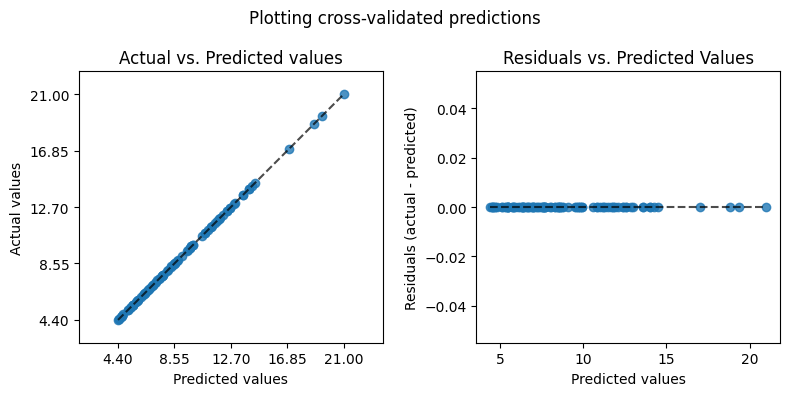

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from skopt.space import Integer, Categorical
from model_hyperparameter_tuning import tune_hyperparameters

search_space = {
    'n_neighbors': Integer(3, 15),
    'weights': Categorical(['uniform', 'distance']),
    'p': Categorical([1, 2]),
    'metric': Categorical(['minkowski', 'euclidean', 'chebyshev']),
    'leaf_size': Integer(10, 50),
}

model = KNeighborsRegressor(n_jobs=-1)
best_estimator, best_params = tune_hyperparameters(model, search_space, pd.DataFrame(), pd.Series(), X_additional_train, y_additional_train, num_iter=25, n_splits=3)

In [3]:
import os
import joblib

best_estimator_file_name = f'{model.__class__.__name__}.best_estimator.pkl'
joblib.dump(best_estimator, os.path.join('models', best_estimator_file_name))

['models/KNeighborsRegressor.best_estimator.pkl']